In [18]:
import gurobipy as gp
from gurobipy import GRB
from gurobipy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
########################################
########### IMPORT DATA ################
########################################

#list of teams that are included in the analysis
Team_list={
0:"Atlanta Falcons",1:"Carolina Panthers",2:"Chicago Bears",3:"Detroit Lions",
4:"Green Bay Packers",5:"Minnesota Vikings",6:"New Orleans Saints",7:"New York Giants",
8:"Philadelphia Eagles",9:"Tampa Bay Buccaneers",10:"Washington Football Team",11:"Baltimore Ravens",
12:"Buffalo Bills",13:"Cincinnati Bengals",14:"Cleveland Browns",15:"Houston Texans",
16:"Indianapolis Colts",17:"Jacksonville Jaguars",18:"Miami Dolphins",19:"New England Patriots",
20:"New York Jets",21:"Pittsburgh Steelers",22:"Tennessee Titans",23:"Dallas Cowboys"}


W=set(list(range(0,13))) #set of weeks, total of 12 weeks
T=set(list(range(0,24)))

#set of teams all, total of 24 teams
 #set of conference
D1=set(list(range(0,12)))  #set of AFC teams
D2=set(list(range(12,24))) #set of NFC teams

#read the distance file
dist=pd.read_csv("distance.csv",index_col=0)

In [15]:
########################################
########### MODEL ######################
########################################

# Create an empty model
m4= gp.Model(name="NFL2b")

# ADD DECISION VARIABLES HERE
dist=pd.read_csv("distance.csv",index_col=0)
games = m4.addVars(W,Team_list,Team_list, vtype = GRB.BINARY, name = "game")
########################################
#### CONSTRAINTS & OBJ FUNCTIONS #######
########################################

# ADD CONSTRAINTS HERE

#Season is 12 weeks long

con1 = m4.addConstrs(gp.quicksum(games[k,i,j] for i in T for j in T if i!=j) == 12 for k in W if k != 8)
    
#Each team would play once per week
    
con2 = m4.addConstrs((gp.quicksum((games[k,i,j] + games[k,j,i] for j in T if j != i)) == 1 for k in W if k != 8 for i in T))
    
#All 12 games that a team plays is against a different opponent

con3 = m4.addConstrs(gp.quicksum(games[k,i,j] + games[k,j,i] for k in W ) <= 1 for i in T for j in T if i != j)
    
#Each team would play at most six home games 

con4 = m4.addConstrs(gp.quicksum(games[k,i,j] for j in T for k in W if j != i) <= 6 for i in T)

#No team would play more than (i) two consecutive games at home and (ii) two consecutive games away

con5 = m4.addConstrs(gp.quicksum(games[k,i,j] + games[k+1,i,j]  + games[k+2,i,j] for j in T) <= 2 for i in T for k in range(0,10))

con6 = m4.addConstrs(gp.quicksum(games[k,i,j] + games[k+1,i,j]  + games[k+2,i,j] for i in T) <= 2 for j in T for k in range(0,10))

#NFL schedulers asked to set a constraint on the total distance that any team needs to travel
#We compare 11,000 and 10,990 miles here
con7 = m4.addConstrs(gp.quicksum(2*dist.iloc[i,j]*games[k,i,j] for i in T for k in W) <= 11000 for j in T)

# ADD OBJECTIVE FUNCTION HERE

obj = m4.setObjective(gp.quicksum(2*dist.iloc[i,j]*games[k,i,j] for i in T for j in T for k in W), GRB.MINIMIZE)
#optimize the model
m4.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 1380 rows, 7488 columns and 83110 nonzeros
Model fingerprint: 0x4324172a
Variable types: 0 continuous, 7488 integer (7488 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [7e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 420 rows and 864 columns
Presolve time: 0.19s
Presolved: 960 rows, 6624 columns, 62352 nonzeros
Variable types: 0 continuous, 6624 integer (6624 binary)

Root relaxation: objective 1.659080e+05, 8801 iterations, 1.33 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 165908.000    0  150          - 165908.000      -     -    3s
H    0     0                    169320.00000 165908.000  2.02%     -    3s
     0     0 165908.000    0  429 169320.000 165908.000  2.02%     -    7s
H    0     0  

In [6]:
########################################
########### PRINT RESULTS ##############
########################################

# ADD PRINTING HERE:
#loop all 3 dimensions, if statement selecting 14
# print the total distance travelled by all teams
print('\nValue of objective function: %g' % m4.objVal)

# Print optimal values for the decision variables
print('\nDecision variables:')
for v in m4.getVars():
    print('%s = %g' % (v.varName, v.x))


Value of objective function: 165908

Decision variables:
game[0,0,0] = 0
game[0,0,1] = -0
game[0,0,2] = -0
game[0,0,3] = -0
game[0,0,4] = -0
game[0,0,5] = -0
game[0,0,6] = -0
game[0,0,7] = -0
game[0,0,8] = -0
game[0,0,9] = -0
game[0,0,10] = -0
game[0,0,11] = -0
game[0,0,12] = -0
game[0,0,13] = -0
game[0,0,14] = -0
game[0,0,15] = -0
game[0,0,16] = -0
game[0,0,17] = -0
game[0,0,18] = -0
game[0,0,19] = -0
game[0,0,20] = -0
game[0,0,21] = -0
game[0,0,22] = -0
game[0,0,23] = -0
game[0,1,0] = -0
game[0,1,1] = 0
game[0,1,2] = -0
game[0,1,3] = -0
game[0,1,4] = -0
game[0,1,5] = -0
game[0,1,6] = -0
game[0,1,7] = -0
game[0,1,8] = -0
game[0,1,9] = -0
game[0,1,10] = -0
game[0,1,11] = -0
game[0,1,12] = -0
game[0,1,13] = -0
game[0,1,14] = -0
game[0,1,15] = -0
game[0,1,16] = -0
game[0,1,17] = -0
game[0,1,18] = -0
game[0,1,19] = -0
game[0,1,20] = -0
game[0,1,21] = -0
game[0,1,22] = -0
game[0,1,23] = -0
game[0,2,0] = -0
game[0,2,1] = -0
game[0,2,2] = 0
game[0,2,3] = -0
game[0,2,4] = 0
game[0,2,5] = 1
g

game[3,5,2] = -0
game[3,5,3] = -0
game[3,5,4] = -0
game[3,5,5] = 0
game[3,5,6] = -0
game[3,5,7] = -0
game[3,5,8] = -0
game[3,5,9] = -0
game[3,5,10] = -0
game[3,5,11] = -0
game[3,5,12] = -0
game[3,5,13] = -0
game[3,5,14] = -0
game[3,5,15] = 1
game[3,5,16] = -0
game[3,5,17] = -0
game[3,5,18] = -0
game[3,5,19] = -0
game[3,5,20] = -0
game[3,5,21] = -0
game[3,5,22] = -0
game[3,5,23] = -0
game[3,6,0] = -0
game[3,6,1] = -0
game[3,6,2] = -0
game[3,6,3] = -0
game[3,6,4] = -0
game[3,6,5] = -0
game[3,6,6] = 0
game[3,6,7] = -0
game[3,6,8] = -0
game[3,6,9] = -0
game[3,6,10] = -0
game[3,6,11] = -0
game[3,6,12] = -0
game[3,6,13] = -0
game[3,6,14] = -0
game[3,6,15] = -0
game[3,6,16] = -0
game[3,6,17] = -0
game[3,6,18] = -0
game[3,6,19] = -0
game[3,6,20] = -0
game[3,6,21] = -0
game[3,6,22] = 1
game[3,6,23] = -0
game[3,7,0] = -0
game[3,7,1] = 0
game[3,7,2] = -0
game[3,7,3] = -0
game[3,7,4] = -0
game[3,7,5] = -0
game[3,7,6] = -0
game[3,7,7] = 0
game[3,7,8] = -0
game[3,7,9] = -0
game[3,7,10] = -0
game[3,7

game[5,19,13] = 0
game[5,19,14] = -0
game[5,19,15] = -0
game[5,19,16] = -0
game[5,19,17] = -0
game[5,19,18] = -0
game[5,19,19] = 0
game[5,19,20] = -0
game[5,19,21] = 0
game[5,19,22] = -0
game[5,19,23] = -0
game[5,20,0] = -0
game[5,20,1] = -0
game[5,20,2] = -0
game[5,20,3] = -0
game[5,20,4] = -0
game[5,20,5] = -0
game[5,20,6] = -0
game[5,20,7] = 1
game[5,20,8] = -0
game[5,20,9] = -0
game[5,20,10] = -0
game[5,20,11] = -0
game[5,20,12] = -0
game[5,20,13] = -0
game[5,20,14] = -0
game[5,20,15] = -0
game[5,20,16] = -0
game[5,20,17] = -0
game[5,20,18] = -0
game[5,20,19] = -0
game[5,20,20] = 0
game[5,20,21] = -0
game[5,20,22] = -0
game[5,20,23] = -0
game[5,21,0] = -0
game[5,21,1] = -0
game[5,21,2] = -0
game[5,21,3] = -0
game[5,21,4] = -0
game[5,21,5] = -0
game[5,21,6] = -0
game[5,21,7] = -0
game[5,21,8] = -0
game[5,21,9] = -0
game[5,21,10] = -0
game[5,21,11] = -0
game[5,21,12] = -0
game[5,21,13] = -0
game[5,21,14] = -0
game[5,21,15] = -0
game[5,21,16] = -0
game[5,21,17] = -0
game[5,21,18] = -0

game[8,10,1] = 0
game[8,10,2] = 0
game[8,10,3] = 0
game[8,10,4] = 0
game[8,10,5] = 0
game[8,10,6] = 0
game[8,10,7] = 0
game[8,10,8] = 0
game[8,10,9] = 0
game[8,10,10] = 0
game[8,10,11] = 0
game[8,10,12] = 0
game[8,10,13] = 0
game[8,10,14] = 0
game[8,10,15] = 0
game[8,10,16] = 0
game[8,10,17] = 0
game[8,10,18] = 0
game[8,10,19] = 0
game[8,10,20] = 0
game[8,10,21] = 0
game[8,10,22] = 0
game[8,10,23] = 0
game[8,11,0] = 0
game[8,11,1] = 0
game[8,11,2] = 0
game[8,11,3] = 0
game[8,11,4] = 0
game[8,11,5] = 0
game[8,11,6] = 0
game[8,11,7] = 0
game[8,11,8] = 0
game[8,11,9] = 0
game[8,11,10] = 0
game[8,11,11] = 0
game[8,11,12] = 0
game[8,11,13] = 0
game[8,11,14] = 0
game[8,11,15] = 0
game[8,11,16] = 0
game[8,11,17] = 0
game[8,11,18] = 0
game[8,11,19] = 0
game[8,11,20] = 0
game[8,11,21] = 0
game[8,11,22] = 0
game[8,11,23] = 0
game[8,12,0] = 0
game[8,12,1] = 0
game[8,12,2] = 0
game[8,12,3] = 0
game[8,12,4] = 0
game[8,12,5] = 0
game[8,12,6] = 0
game[8,12,7] = 0
game[8,12,8] = 0
game[8,12,9] = 0
gam

game[10,18,9] = -0
game[10,18,10] = -0
game[10,18,11] = -0
game[10,18,12] = -0
game[10,18,13] = -0
game[10,18,14] = -0
game[10,18,15] = -0
game[10,18,16] = -0
game[10,18,17] = -0
game[10,18,18] = 0
game[10,18,19] = -0
game[10,18,20] = -0
game[10,18,21] = -0
game[10,18,22] = -0
game[10,18,23] = -0
game[10,19,0] = -0
game[10,19,1] = 0
game[10,19,2] = -0
game[10,19,3] = 0
game[10,19,4] = -0
game[10,19,5] = -0
game[10,19,6] = -0
game[10,19,7] = 0
game[10,19,8] = -0
game[10,19,9] = 0
game[10,19,10] = -0
game[10,19,11] = -0
game[10,19,12] = 0
game[10,19,13] = -0
game[10,19,14] = 0
game[10,19,15] = -0
game[10,19,16] = -0
game[10,19,17] = -0
game[10,19,18] = -0
game[10,19,19] = 0
game[10,19,20] = -0
game[10,19,21] = 0
game[10,19,22] = -0
game[10,19,23] = -0
game[10,20,0] = -0
game[10,20,1] = 0
game[10,20,2] = -0
game[10,20,3] = -0
game[10,20,4] = -0
game[10,20,5] = -0
game[10,20,6] = -0
game[10,20,7] = 0
game[10,20,8] = -0
game[10,20,9] = 0
game[10,20,10] = -0
game[10,20,11] = -0
game[10,20,12

game[12,18,4] = -0
game[12,18,5] = -0
game[12,18,6] = -0
game[12,18,7] = -0
game[12,18,8] = -0
game[12,18,9] = -0
game[12,18,10] = -0
game[12,18,11] = -0
game[12,18,12] = -0
game[12,18,13] = -0
game[12,18,14] = -0
game[12,18,15] = -0
game[12,18,16] = -0
game[12,18,17] = -0
game[12,18,18] = 0
game[12,18,19] = -0
game[12,18,20] = -0
game[12,18,21] = -0
game[12,18,22] = -0
game[12,18,23] = -0
game[12,19,0] = -0
game[12,19,1] = -0
game[12,19,2] = -0
game[12,19,3] = -0
game[12,19,4] = 1
game[12,19,5] = -0
game[12,19,6] = -0
game[12,19,7] = -0
game[12,19,8] = -0
game[12,19,9] = -0
game[12,19,10] = -0
game[12,19,11] = -0
game[12,19,12] = -0
game[12,19,13] = -0
game[12,19,14] = -0
game[12,19,15] = -0
game[12,19,16] = -0
game[12,19,17] = -0
game[12,19,18] = -0
game[12,19,19] = 0
game[12,19,20] = -0
game[12,19,21] = -0
game[12,19,22] = -0
game[12,19,23] = -0
game[12,20,0] = -0
game[12,20,1] = -0
game[12,20,2] = -0
game[12,20,3] = -0
game[12,20,4] = -0
game[12,20,5] = -0
game[12,20,6] = -0
game[1

In [7]:
m4.printAttr('X')


    Variable            X 
-------------------------
 game[0,2,5]            1 
game[0,3,16]            1 
game[0,6,18]            1 
 game[0,7,1]            1 
 game[0,8,9]            1 
game[0,11,14]            1 
game[0,13,19]            1 
game[0,15,17]            1 
game[0,20,12]            1 
game[0,21,10]            1 
game[0,22,0]            1 
game[0,23,4]            1 
 game[1,0,5]            1 
 game[1,1,8]            1 
 game[1,4,3]            1 
game[1,10,9]            1 
game[1,13,2]            1 
game[1,14,12]            1 
game[1,16,6]            1 
game[1,18,7]            1 
game[1,20,19]            1 
game[1,21,11]            1 
game[1,22,17]            1 
game[1,23,15]            1 
game[2,0,18]            1 
 game[2,2,3]            1 
game[2,4,16]            1 
game[2,5,13]            1 
game[2,6,23]            1 
 game[2,9,7]            1 
game[2,11,8]            1 
game[2,12,21]            1 
game[2,14,20]            1 
game[2,15,22]            1 
game[2,17,10]  

In [19]:
#games[k=week,i=home,j=away]
#a = home, b=away
#11,000 upper bound
distance1= pd.DataFrame(columns = W, index =T)
for i in T:
    for k in W:
        for j in T:
            a=m4.getVarByName("game[%s,%s,%s]"%(k,i,j)).x
            b=m4.getVarByName("game[%s,%s,%s]"%(k,j,i)).x
            if(a==1.0 and b!=1.0):
                distance1.iloc[i,k]=0
                distance1.iloc[j,k]=2*dist.iloc[i,j]
            elif(b==1.0 and a!=1.0):
                distance1.iloc[j,k]=0
                distance1.iloc[i,k]=2*dist.iloc[i,j]
#replace.nan
distance1.fillna(0,inplace=True)                
distance1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,500,0,0,1292,1586,0,1586,912,0,0,490,0,0
1,1250,0,1648,1434,0,0,814,766,0,1160,0,0,0
2,0,594,0,368,0,0,944,1850,0,1056,0,1934,0
3,0,978,568,0,0,540,0,0,0,0,1382,1412,1166
4,2346,0,0,1014,0,2574,2260,0,0,0,414,0,2378
5,818,2226,0,0,1870,0,1182,1504,0,558,0,0,0
6,0,1638,0,0,1430,1314,0,0,0,940,0,2398,1092
7,0,2536,2262,0,0,0,0,710,0,1226,912,0,0
8,0,1074,202,0,590,0,192,0,0,0,610,2358,0
9,2084,1822,0,0,1882,0,398,0,0,0,0,1410,1962


In [20]:
##11000 upper bound
team_dist=distance1.sum(axis=1)
team_dist.sort_values()

10     3160
14     3772
21     3936
20     4716
11     4728
12     4978
8      5026
16     5258
19     5784
3      6046
0      6366
13     6506
2      6746
1      7072
7      7646
17     7844
22     8090
5      8158
6      8812
9      9558
15    10116
23    10208
18    10396
4     10986
dtype: int64

Text(0.5, 1.0, 'Upper Bound 11,000 miles')

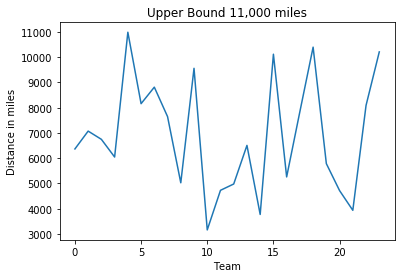

In [42]:
plt.plot(team_dist)
plt.xlabel("Team")
plt.ylabel("Distance in miles")
plt.title("Upper Bound 11,000 miles")

In [38]:
team_dist.iloc[1]

SyntaxError: invalid syntax (<ipython-input-38-65778ec2082a>, line 1)

In [11]:
#games[k=week,i=home,j=away]
#a = home, b=away
#10,990 upper bound
distance1= pd.DataFrame(columns = W, index =T)
for i in T:
    for k in W:
        for j in T:
            a=m4.getVarByName("game[%s,%s,%s]"%(k,i,j)).x
            b=m4.getVarByName("game[%s,%s,%s]"%(k,j,i)).x
            if(a==1.0 and b!=1.0):
                distance1.iloc[i,k]=0
                distance1.iloc[j,k]=2*dist.iloc[i,j]
            elif(b==1.0 and a!=1.0):
                distance1.iloc[j,k]=0
                distance1.iloc[i,k]=2*dist.iloc[i,j]
#replace.nan
distance1.fillna(0,inplace=True)                
distance1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,940,912,0,1586,0,692,0,0,0,500,2226,0
1,1430,0,814,0,0,874,0,1250,0,2076,0,0,490
2,0,1056,414,0,688,0,0,818,0,944,368,0,0
3,0,572,0,1412,0,568,526,0,0,1226,0,0,978
4,2378,558,0,1014,0,0,1100,0,0,788,0,2346,0
5,2352,0,1382,1870,0,1758,1182,0,0,1408,0,0,0
6,0,0,1064,0,2260,0,1850,1010,0,1702,2398,0,0
7,378,0,912,0,0,408,710,0,0,0,2536,0,0
8,1692,0,0,192,1074,0,0,2358,0,0,202,1166,0
9,0,2084,0,1314,0,1822,0,1962,0,0,1160,2262,0


In [12]:
#10,990
team_dist=distance1.sum(axis=1)
team_dist.sort_values()

14     4148
2      4288
21     4470
12     4648
10     4784
16     4852
7      4944
3      5282
19     5654
20     5718
17     6096
8      6684
11     6704
13     6846
0      6856
1      6934
22     7024
4      8184
23     9884
5      9952
6     10284
18    10308
9     10604
15    10760
dtype: int64

In [14]:
########################################
########### MODEL ######################
########################################

# Create an empty model
m4= gp.Model(name="NFL2b")

# ADD DECISION VARIABLES HERE
dist=pd.read_csv("distance.csv",index_col=0)
games = m4.addVars(W,Team_list,Team_list, vtype = GRB.BINARY, name = "game")
########################################
#### CONSTRAINTS & OBJ FUNCTIONS #######
########################################

# ADD CONSTRAINTS HERE

#Season is 12 weeks long

con1 = m4.addConstrs(gp.quicksum(games[k,i,j] for i in T for j in T if i!=j) == 12 for k in W if k != 8)
    
#Each team would play once per week
    
con2 = m4.addConstrs((gp.quicksum((games[k,i,j] + games[k,j,i] for j in T if j != i)) == 1 for k in W if k != 8 for i in T))
    
#All 12 games that a team plays is against a different opponent

con3 = m4.addConstrs(gp.quicksum(games[k,i,j] + games[k,j,i] for k in W ) <= 1 for i in T for j in T if i != j)
    
#Each team would play at most six home games 

con4 = m4.addConstrs(gp.quicksum(games[k,i,j] for j in T for k in W if j != i) <= 6 for i in T)

#No team would play more than (i) two consecutive games at home and (ii) two consecutive games away

con5 = m4.addConstrs(gp.quicksum(games[k,i,j] + games[k+1,i,j]  + games[k+2,i,j] for j in T) <= 2 for i in T for k in range(0,10))

con6 = m4.addConstrs(gp.quicksum(games[k,i,j] + games[k+1,i,j]  + games[k+2,i,j] for i in T) <= 2 for j in T for k in range(0,10))

#NFL schedulers asked to set a constraint on the total distance that any team needs to travel
#Infeasible at 9,000 miles

con7 = m4.addConstrs(gp.quicksum(2*dist.iloc[i,j]*games[k,i,j] for i in T for k in W) <= 9000 for j in T)

# ADD OBJECTIVE FUNCTION HERE

obj = m4.setObjective(gp.quicksum(2*dist.iloc[i,j]*games[k,i,j] for i in T for j in T for k in W), GRB.MINIMIZE)
#optimize the model
m4.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 1380 rows, 7488 columns and 83110 nonzeros
Model fingerprint: 0xd62ce8a4
Variable types: 0 continuous, 7488 integer (7488 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [7e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+03]
Presolve removed 420 rows and 864 columns
Presolve time: 0.15s
Presolved: 960 rows, 6624 columns, 62352 nonzeros
Variable types: 0 continuous, 6624 integer (6624 binary)

Root relaxation: objective 1.659080e+05, 9996 iterations, 1.76 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 165908.000    0  338          - 165908.000      -     -    4s
     0     0 165908.000    0  433          - 165908.000      -     -    5s
     0     0 165908.000    0  425          - 165908.000      -     -    5s
     0     0 1